# Avacado Project
   
   ### Problem Statement:
        Avocado is a fruit consumed by people heavily in the United States. 

   ### Content
        This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

        The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

        Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

        The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

   ### DATA ATTRIBUTES :

        Date - The date of the observation
        AveragePrice - the average price of a single avocado
        type - conventional or organic
        year - the year
        Region - the city or region of the observation
        Total Volume - Total number of avocados sold
        4046 - Total number of avocados with PLU 4046 sold
        4225 - Total number of avocados with PLU 4225 sold
        4770 - Total number of avocados with PLU 4770 sold


   ### Inspiration /Label 

        Your task is to make a mode that can consider the data provided and predict the Average Price.

### STEP 1 : DATA PREPARATION
    - Loading imports
    - loading Dataset
    - Checking dtypes of Data
    - Checking information about data, STD , duplicate data , null/ missing vlaues.  

In [1]:
#IMPORTING IMPORTS

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV


In [2]:
train = pd.read_csv('avocado.csv')

In [3]:
avacado_data = train.iloc[:1517]

In [4]:
avacado_data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
avacado_data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


   #### OBSERVATIONS
        ------ AVOCADO TYPE/ Region/ Year are  Categorical Data-------
        ------ 1 DAte Column ----------
        ------ Average Price, Total Volume, PLU 4046, 4225, 4770, Total bags, small bags, large bags, XL Bags
                  are continous Columns.----
        ------ XLarge bags many values as Zero .
        
        
   #### NEED TO CHANGE DTYPE OF YEAR AS INT, Date to DateTime
        
          
                  

In [6]:
avacado_data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [7]:
### Changing data type of Year to int
avacado_data['year'] = avacado_data['year'].astype('int')

In [8]:
avacado_data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int32
region           object
dtype: object

In [9]:
(avacado_data.isnull()).sum(axis=0)
### Checking for missing vLUES

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

        -------NO MISSING VALUES-------

### STEP 2: EDA
        - Univariante Analysis 
        - Bivariante Analysis 
        - Collinearity Check.
        - Multivariant Analysis
        

In [10]:
### UNIVARIANTE ANALYSIS

Text(0.5, 1.0, 'Avocado Average price Distribution Plot')

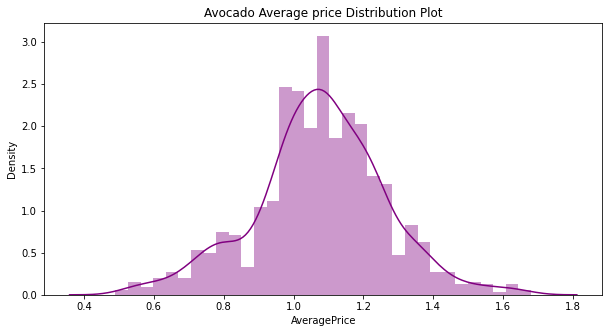

In [11]:
plt.figure(figsize=(10,5))
sb.distplot(avacado_data['AveragePrice'],color='purple')
plt.title('Avocado Average price Distribution Plot')

#### OBSERVATION: 
        ----- Target Variable : Average price of Avocado has a gaussian like structure not containing skewness ----

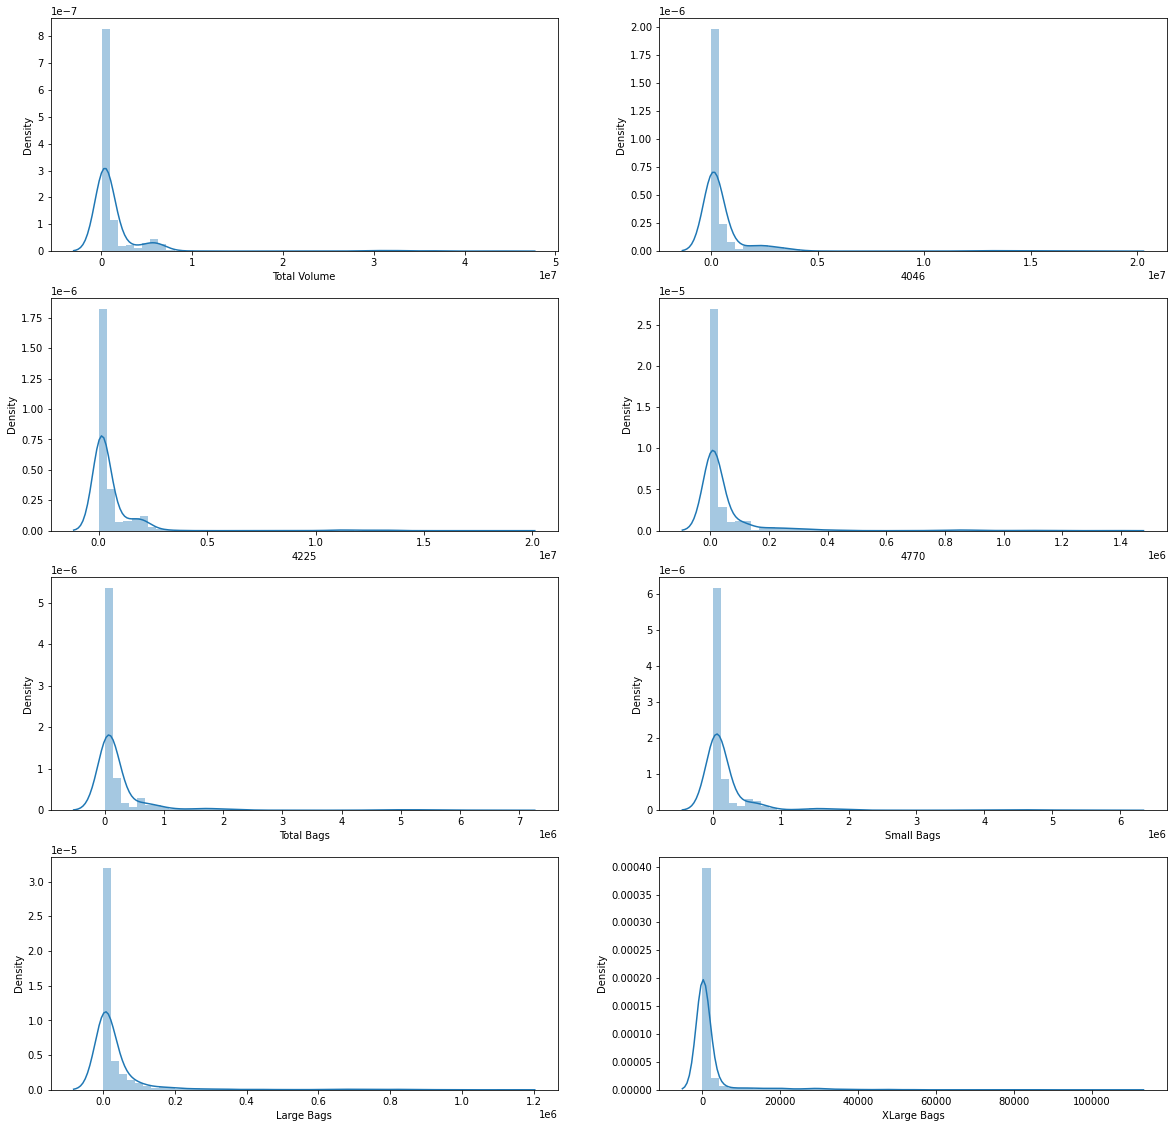

In [12]:
c= 1
plt.figure(figsize=(20,30))
for i in avacado_data.columns[2:-3]:
    
    plt.subplot(6,2,c)
    c=c+1
    sb.distplot(avacado_data[i])
    

#### OBSERVATIONS:
    - Features are highly left skewed.

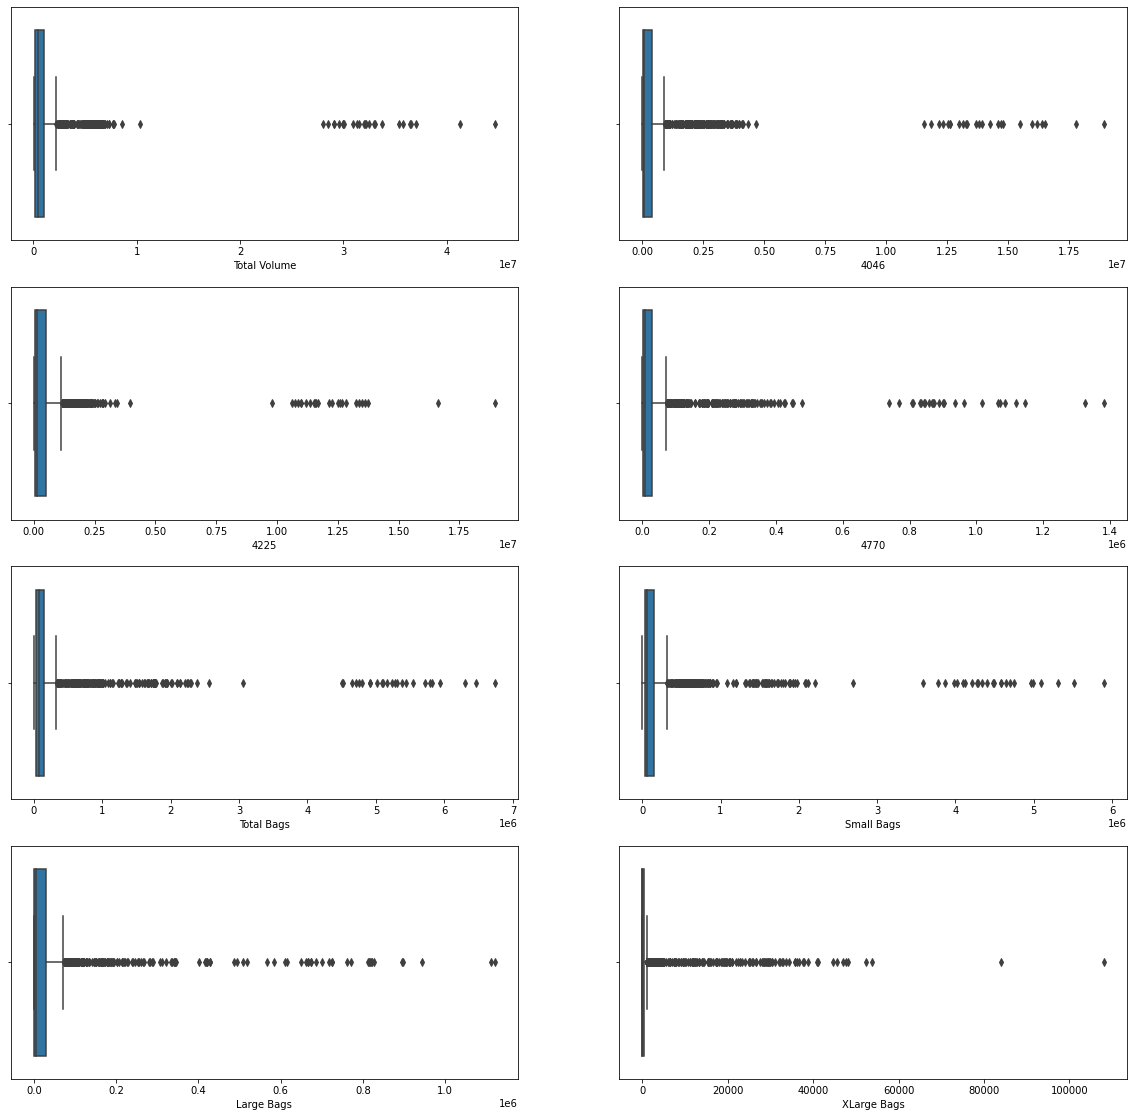

In [13]:
### BOXLOTS of continous variables
c= 1
plt.figure(figsize=(20,30))
for i in avacado_data.columns[2:-3]:
    
    plt.subplot(6,2,c)
    c=c+1
    sb.boxplot(avacado_data[i])
    

#### OBSERVATIONS:
    - TOO MANY OUTLIERS PRESENT, effecting the skewness of the data.

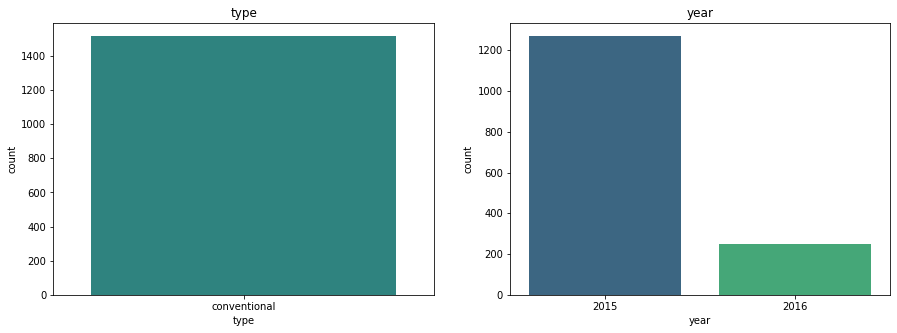

In [14]:
### countplots of continous variables
c= 1
plt.figure(figsize=(15,5))
for i in avacado_data.columns[-3:-1]:
    
    plt.subplot(1,2,c)
    c=c+1
    sb.countplot(avacado_data[i],palette='viridis')
    plt.title(i)
    

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

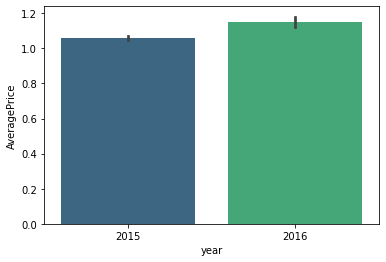

In [15]:
sb.barplot(avacado_data['year'],avacado_data['AveragePrice'],palette='viridis')


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

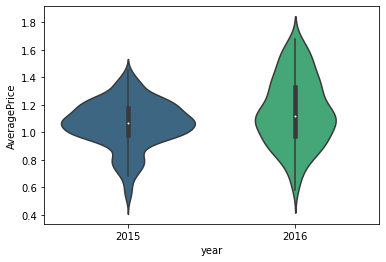

In [16]:
sb.violinplot(avacado_data['year'],avacado_data['AveragePrice'],palette='viridis')


#### OBSERVATION: 
       1. 2015 has Average PRice of Avacado is majorly in moderate range more than 2016.
       2. 2016 has some purchases for highest average price of Avacado.


#### Observations:
    - Avacado Type is of onyl 1 type, all the data points belong to Conventional type, we cN DROP THIS features.
    - 2015 has contributed more to the Data  than 2016.

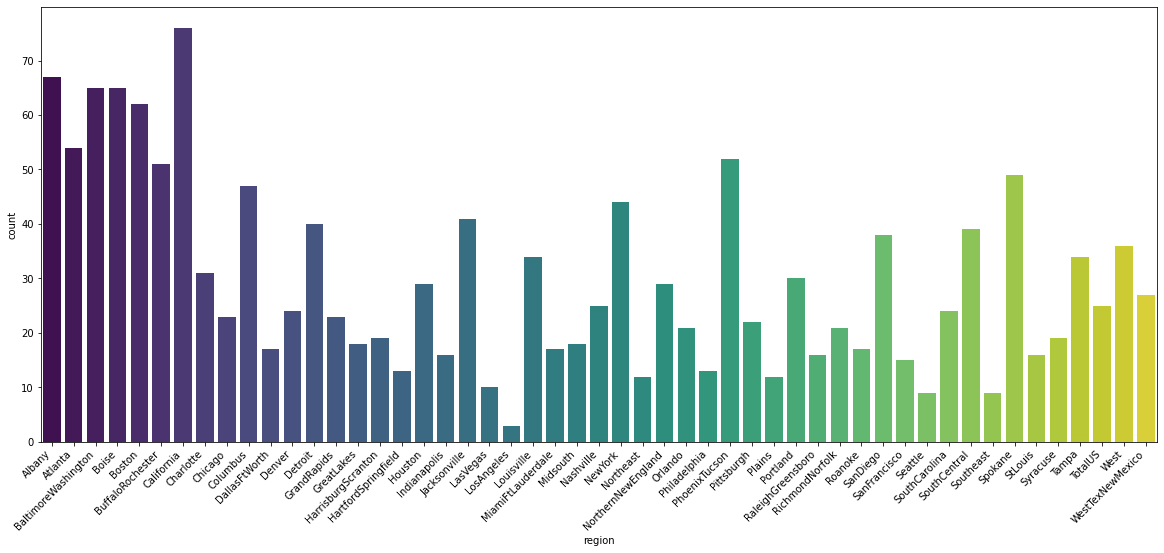

In [17]:
plt.figure(figsize=(20,8))
sb.countplot('region',data=avacado_data,palette='viridis')
plt.xticks( rotation=45, horizontalalignment='right')
plt.show()

#### OBSERVATIONS:
    - Los Angeles  has least data points , where as  Califonia has highest data points.

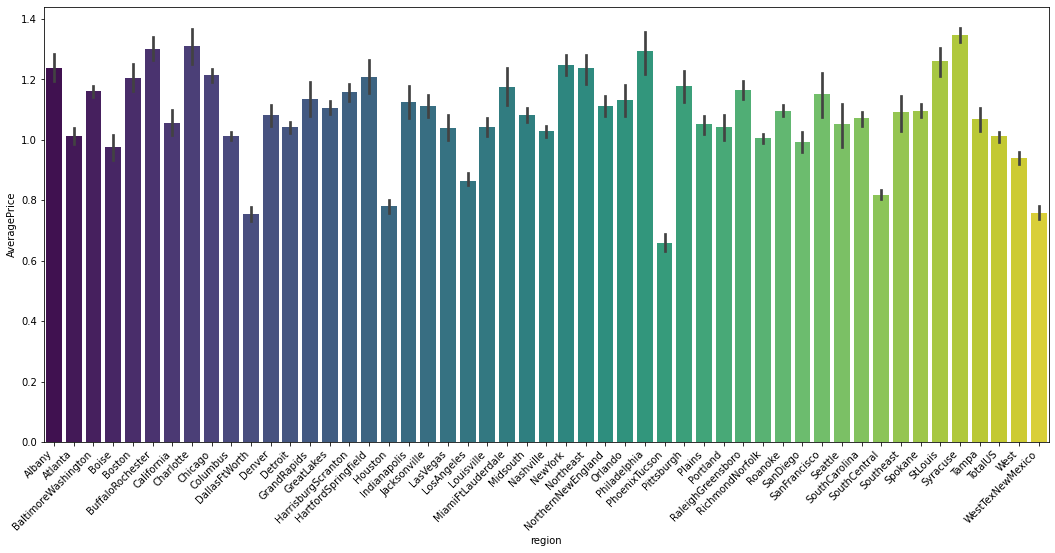

In [18]:
plt.figure(figsize=(18,8))
sb.barplot('region','AveragePrice',data=avacado_data,palette='viridis')
plt.xticks( rotation=45, horizontalalignment='right')
plt.show()

#### OBSERVATIONS:
    - Syracuse has Highest Average Avocado Price.
    - Philadelphaia, Charlotte, BuffaloRochester, Albany has next high Average Prices.
    - DallasFWorth, Houston, Phoenix Tucson has lowest Average Prices of Avacado.
    
    
    
    
   - Most of of the high Average Avocado prices has less data points.

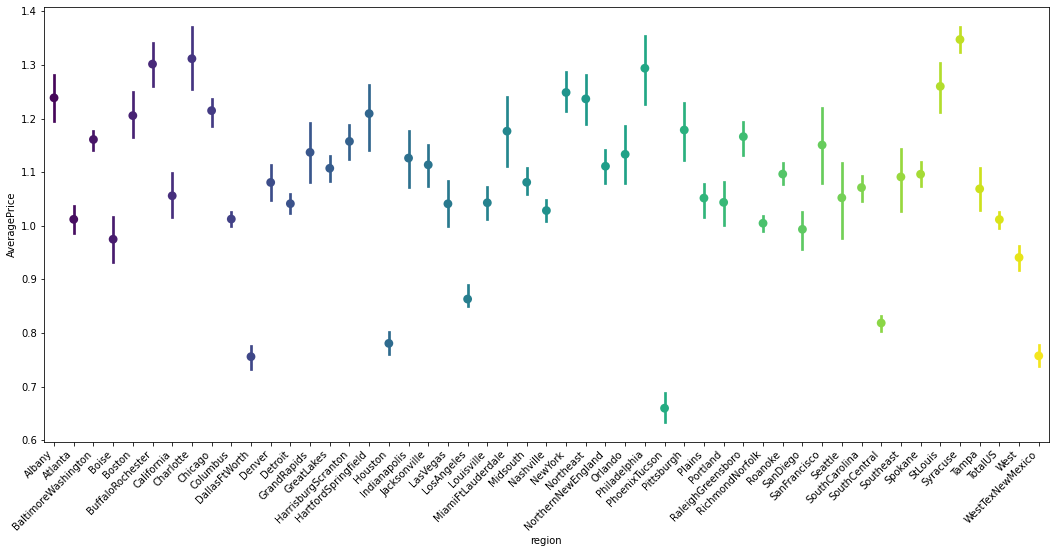

In [19]:
plt.figure(figsize=(18,8))
sb.pointplot('region','AveragePrice',data=avacado_data,palette='viridis')
plt.xticks( rotation=45, horizontalalignment='right')
plt.show()

#### OBSERVATION
    - DallasFtWorth, Huston, LA, Phoenix,South Central, WESTtexNewMexico has low Average Prices.

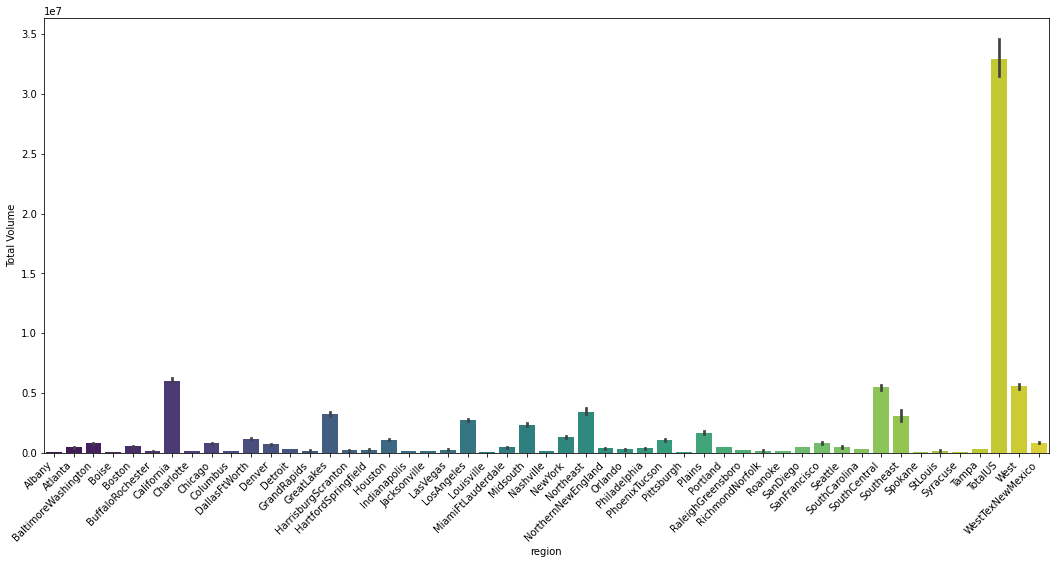

In [20]:
plt.figure(figsize=(18,8))
sb.barplot('region','Total Volume',data=avacado_data,palette='viridis')
plt.xticks( rotation=45, horizontalalignment='right')
plt.show()

#### OBSERVATIONS 
    - TOTAL US has highest Avacados in Volume Sold with not very High or low Average Price but moderate. 
    - Califonia, greatlakes, Los angeles, South central,West, North east, Ssouth east Have Compartively High Average Price And higher Price than Total US.
    
    - Places Where Demand is High like total US, more no of avacados sold has Average Proce of Avacodo less than regions where moderately less demand and higher prices.
     - Places where low volumes of Avacodes are sold like Albany, boise, Tampa , etc have considerable high average proce.
   
   
   **Syracuse has highest Average price of Avacado with lowest volume of Avacado sold.**

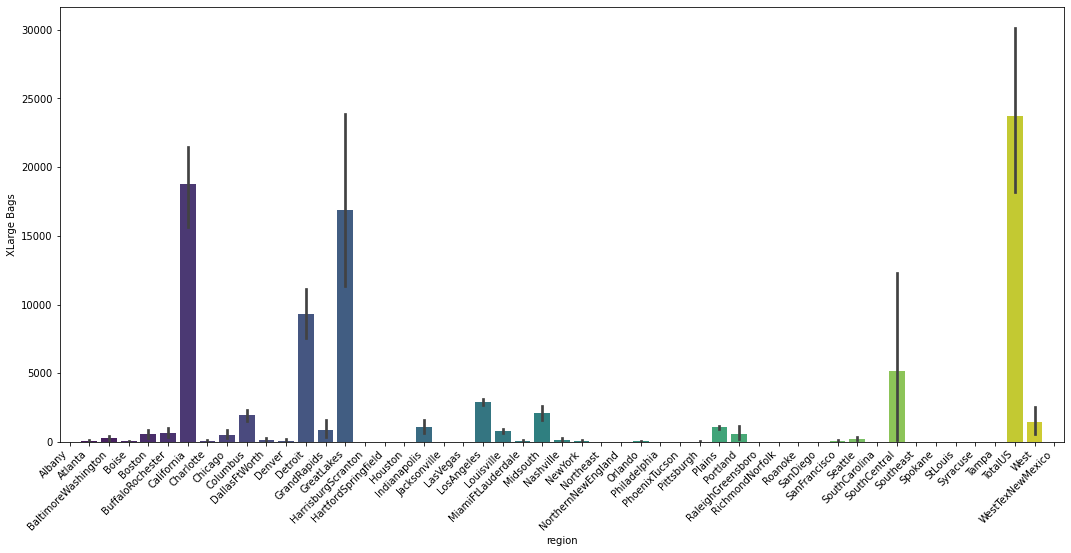

In [21]:
plt.figure(figsize=(18,8))
sb.barplot('region','XLarge Bags',data=avacado_data,palette='viridis')
plt.xticks( rotation=45, horizontalalignment='right')
plt.show()

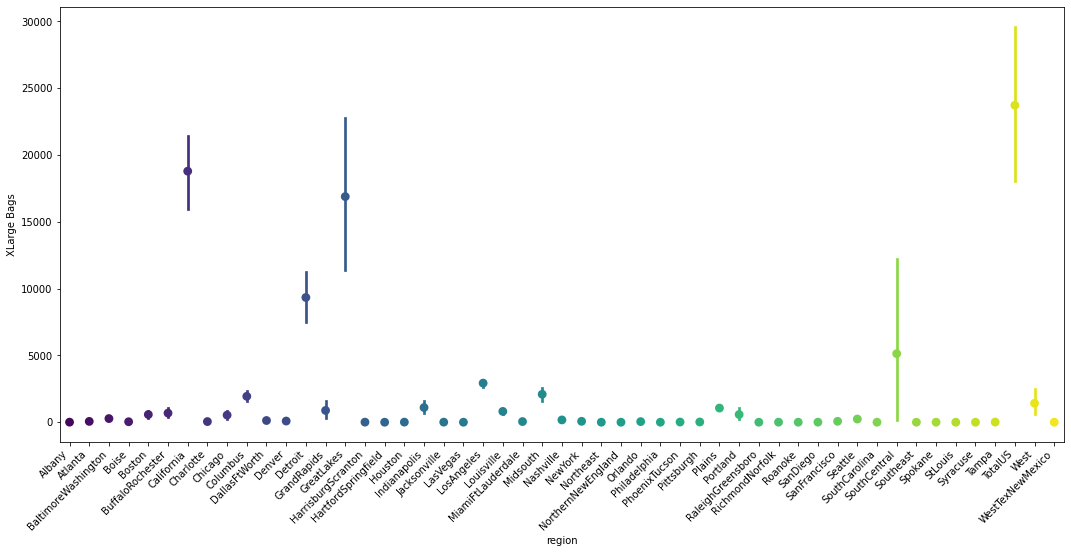

In [22]:
plt.figure(figsize=(18,8))
sb.pointplot('region','XLarge Bags',data=avacado_data,palette='viridis')
plt.xticks( rotation=45, horizontalalignment='right')
plt.show()

#### OBSERVATIONS 
    -- XLArge Bags are sold in Califnia, Total US, Great lakes Majorly.

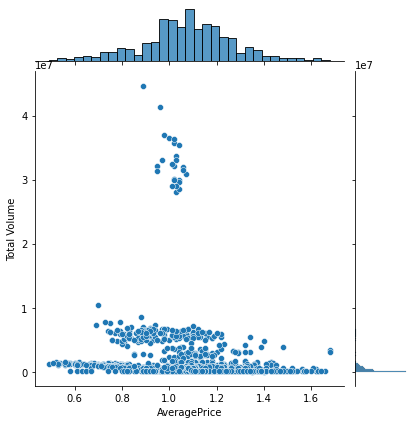

In [23]:
sb.jointplot(avacado_data['AveragePrice'],avacado_data['Total Volume'])

#### OBSERVATIONS:
            - For High Volume of aVAcado, Average Price is Not low / or high , it is alway Moderate.
            - For Very Volume of avacado, Average price is spread equally.
            -for moderate volume of avacado, average prcie lies in low to moderate. not very low/ high.

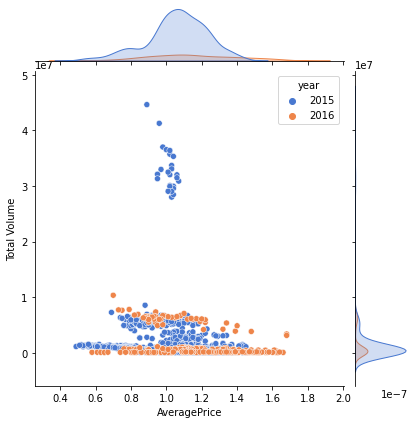

In [24]:
sb.jointplot(avacado_data['AveragePrice'],avacado_data['Total Volume'],hue=avacado_data['year'],palette='muted')

#### OBSERVATIONS  
    --  Purchases of Avacado in 2016 , Total volume has been considerably lower than 2015.
    -- Al the Highest volumes purchases were made in 2015.
    

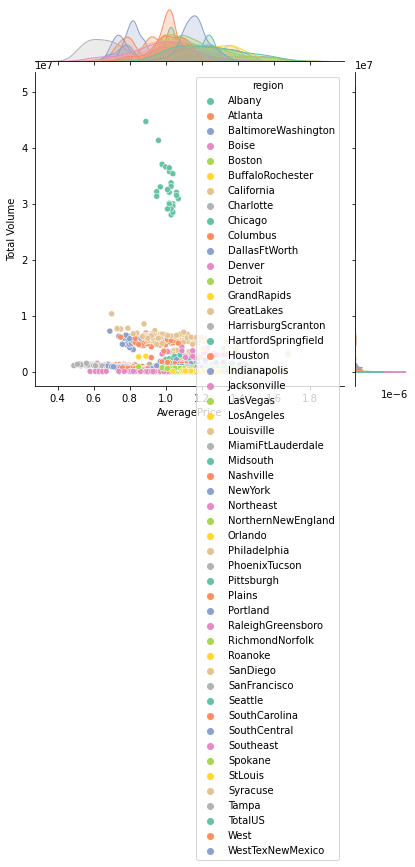

In [25]:
sb.jointplot(avacado_data['AveragePrice'],avacado_data['Total Volume'],hue=avacado_data['region'],palette='Set2')

            --------THe High volume purchases were made in 2015 in Total US-------

<Figure size 1440x720 with 0 Axes>

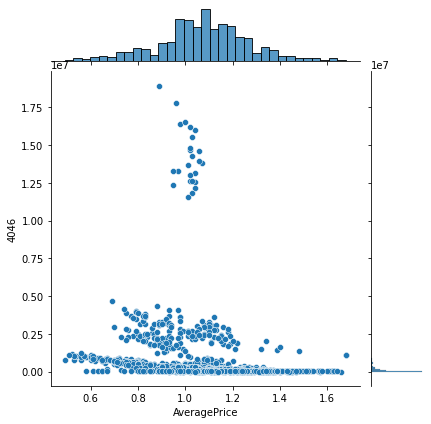

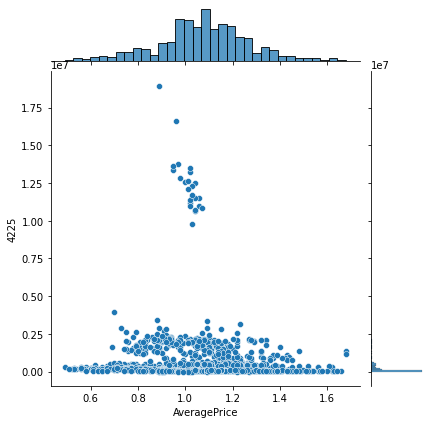

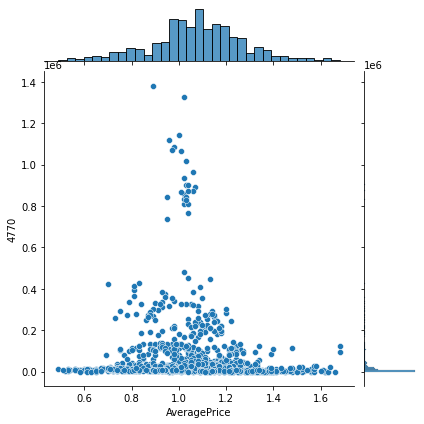

In [26]:

plt.figure(figsize=(20,10))
sb.jointplot(avacado_data['AveragePrice'],avacado_data['4046'])

sb.jointplot(avacado_data['AveragePrice'],avacado_data['4225'])

sb.jointplot(avacado_data['AveragePrice'],avacado_data['4770'])


###### for Avacado PLU's , Same can be said,as for total volume. Similar kind of Graph seen.

<Figure size 1440x720 with 0 Axes>

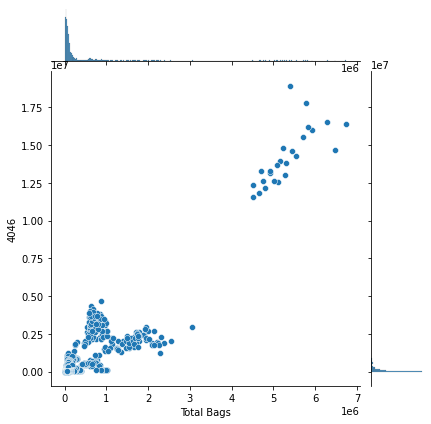

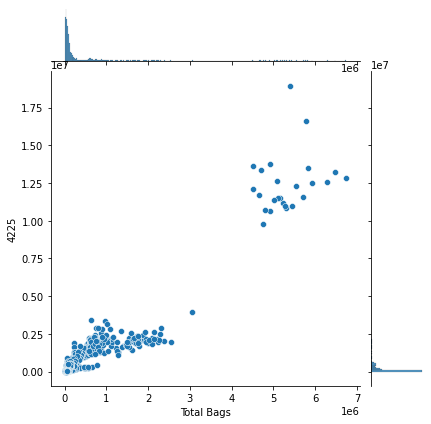

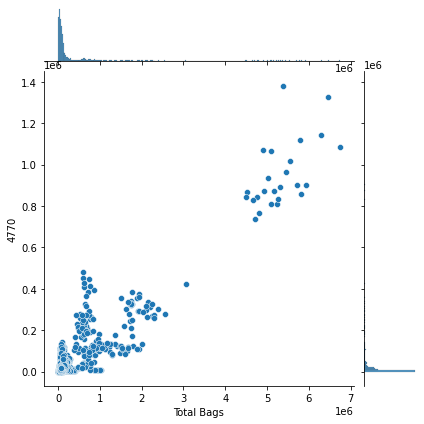

In [27]:

plt.figure(figsize=(20,10))
sb.jointplot(avacado_data['Total Bags'],avacado_data['4046'])

sb.jointplot(avacado_data['Total Bags'],avacado_data['4225'])

sb.jointplot(avacado_data['Total Bags'],avacado_data['4770'])


##### Correlation observed between total bags and PLU's

<Figure size 1440x720 with 0 Axes>

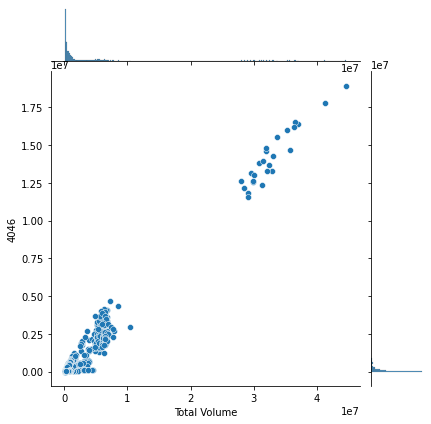

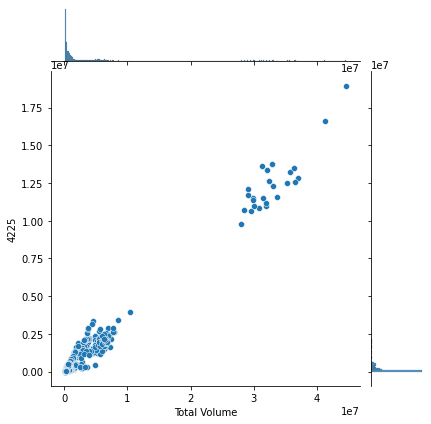

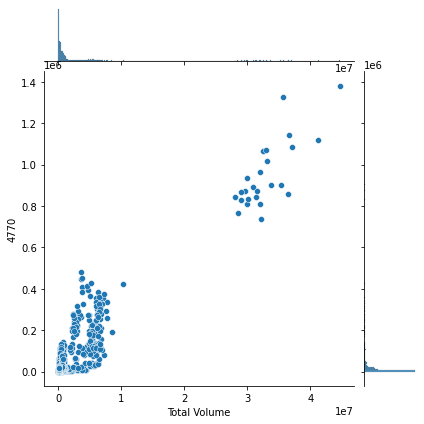

In [28]:

plt.figure(figsize=(20,10))
sb.jointplot(avacado_data['Total Volume'],avacado_data['4046'])

sb.jointplot(avacado_data['Total Volume'],avacado_data['4225'])

sb.jointplot(avacado_data['Total Volume'],avacado_data['4770'])


##### Correlation(Positive Linear) observed between total Volume and PLU's

<Figure size 1440x720 with 0 Axes>

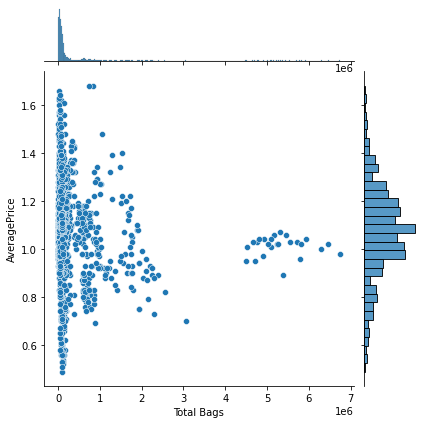

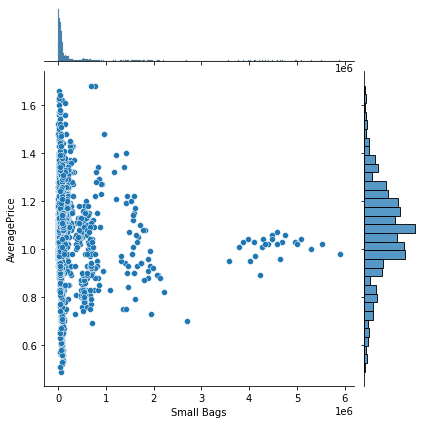

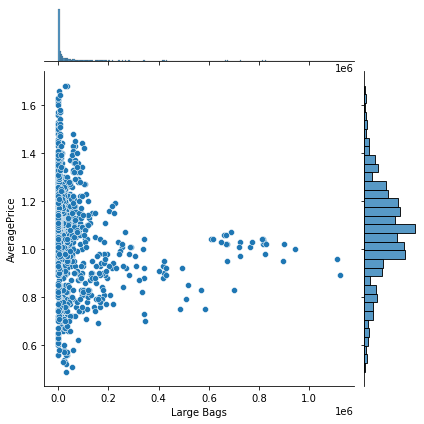

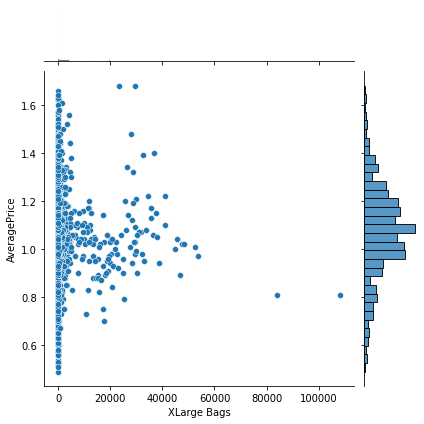

In [29]:

plt.figure(figsize=(20,10))
sb.jointplot(y=avacado_data['AveragePrice'],x = avacado_data['Total Bags'])

sb.jointplot(y=avacado_data['AveragePrice'],x = avacado_data['Small Bags'])

sb.jointplot(y=avacado_data['AveragePrice'],x = avacado_data['Large Bags'])
sb.jointplot(y=avacado_data['AveragePrice'],x = avacado_data['XLarge Bags'])


#### Simiar Graph pattern of Average Price with all the continous Features, High number of Bags have Moderate Averag Avacado Price

<Figure size 1440x720 with 0 Axes>

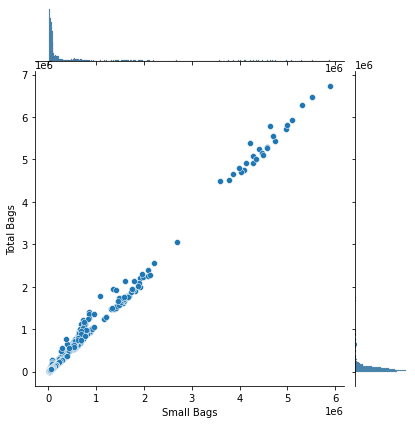

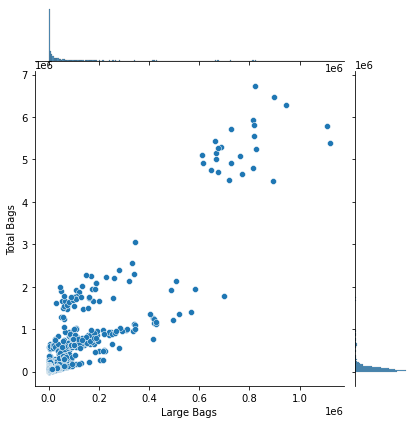

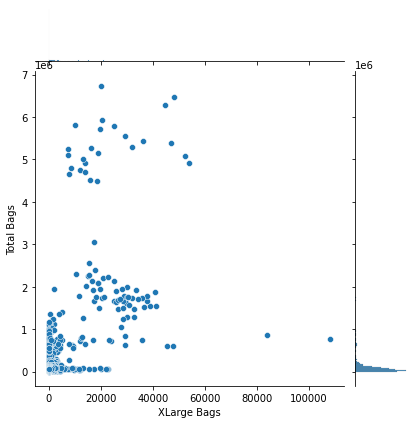

In [30]:

plt.figure(figsize=(20,10))


sb.jointplot(y=avacado_data['Total Bags'],x = avacado_data['Small Bags'])

sb.jointplot(y=avacado_data['Total Bags'],x = avacado_data['Large Bags'])
sb.jointplot(y=avacado_data['Total Bags'],x = avacado_data['XLarge Bags'])


#### OBSERVATIONS:
        - Small Bags Have Linear Relation With Total Bags, higher the Number of small bags, higher the total Bags, Saying that small bags influene the total Bags Higher.
        - Large Bags , Median Bags , no such patterns seen, Scattered data / data grouped near low vlaues of no of bags and total bags.
        
        

<Figure size 1440x720 with 0 Axes>

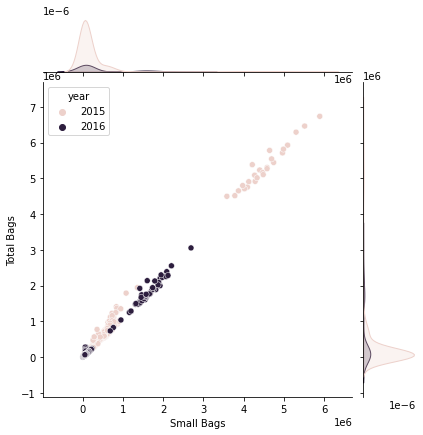

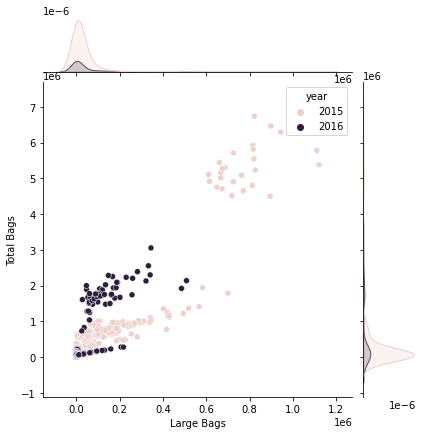

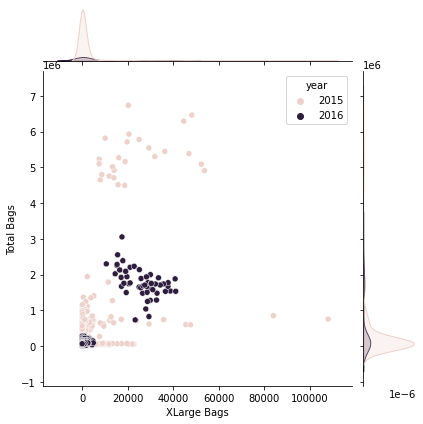

In [31]:

plt.figure(figsize=(20,10))


sb.jointplot(y=avacado_data['Total Bags'],x = avacado_data['Small Bags'],hue=avacado_data['year'])

sb.jointplot(y=avacado_data['Total Bags'],x = avacado_data['Large Bags'],hue=avacado_data['year'])
sb.jointplot(y=avacado_data['Total Bags'],x = avacado_data['XLarge Bags'],hue=avacado_data['year'])


#### OBSERVATIONS:
        - Higher Value of Bags, higher smaller smalls  were made in 2015.
        -in 2016, Most XLarge bags are not  purchase as it it concentrated near zero. 

<Figure size 1440x720 with 0 Axes>

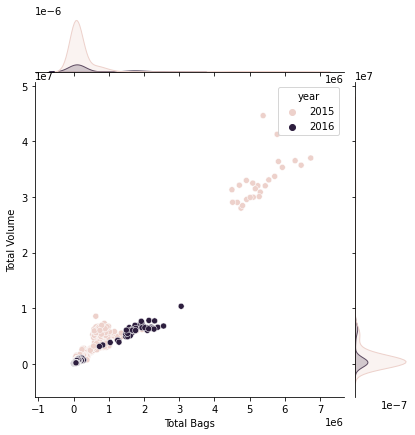

In [32]:

plt.figure(figsize=(20,10))


sb.jointplot(y=avacado_data['Total Volume'],x = avacado_data['Total Bags'],hue=avacado_data['year'])



#### OBSERVATION 
    -- Scattered Data , observed

#### LABEL ENCODING/ DATE COLUMN FIX

In [33]:
avacado_data['Date']  = pd.to_datetime(avacado_data['Date'])

In [34]:
avacado_data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [35]:
avacado_data['Month'] = avacado_data['Date'].apply(lambda mon : mon.month)

In [36]:
avacado_data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,9
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,2
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,9


### ENCODING

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder = LabelEncoder()

In [39]:
avacado_data['region'] = encoder.fit_transform(avacado_data['region'])

In [40]:
avacado_data.drop('type',inplace=True,axis=1)

In [41]:
group = avacado_data.groupby(by=['Month']).mean()

In [42]:
group

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
Month,,,,,,,,,,,
1,1.034894,1.921481e+06,746384.196950,784765.217589,56136.124610,334195.669574,274202.679291,58003.793475,1989.196809,2015.156028,23.354610
2,1.105400,1.518207e+06,604185.220100,556751.503900,47363.333000,309907.366500,269158.561900,39354.841100,1393.963500,2015.220000,20.700000
3,1.066962,1.813050e+06,687542.407342,736001.232532,59935.536962,329570.519937,283293.682152,44131.544114,2145.293671,2015.202532,19.335443
4,1.071532,1.794858e+06,738603.061855,684305.154677,56306.524113,315643.284516,265744.582742,47694.458306,2204.243468,2015.169355,20.653226
5,1.070938,2.007637e+06,905472.046562,702777.456688,65853.145437,333534.738562,288907.918437,42442.333625,2184.486500,2015.112500,21.037500
6,1.047388,1.777940e+06,758980.607463,635810.369701,56956.567537,326192.132985,277882.299403,46149.329030,2160.504552,2015.126866,21.746269
7,1.085632,1.851712e+06,776090.747011,666295.712184,63190.337701,346135.013563,295432.881379,47341.832529,3360.299655,2015.206897,18.873563
8,1.070955,1.436824e+06,571587.086688,567352.896943,40299.814204,257583.812484,221309.764459,34375.000637,1899.047389,2015.108280,22.745223
9,1.074176,1.127477e+06,410843.135824,478261.164945,33366.515824,205005.924945,166835.757143,36009.258242,2160.909560,2015.131868,22.439560


Text(0, 0.5, 'Average price')

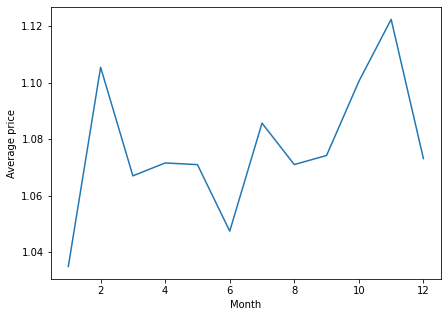

In [43]:
plt.figure(figsize=(7,5))
plt.plot(group['AveragePrice'])
plt.xlabel('Month')
plt.ylabel('Average price')


<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

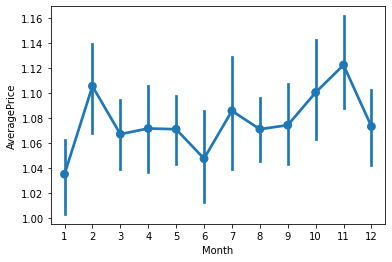

In [44]:
sb.pointplot(avacado_data['Month'],avacado_data['AveragePrice'])

#### WE CAN SEE THE TREND OF AVERAGE PRICE WTH EACH MONTH. 2nd and 11th month having highest price.

In [45]:
avacado_data.drop('Date',inplace=True,axis=1)

<AxesSubplot:xlabel='Month', ylabel='count'>

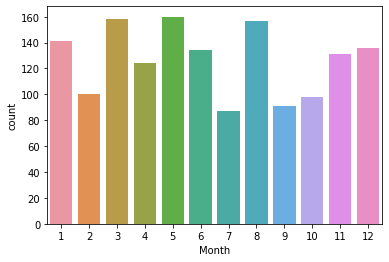

In [46]:
sb.countplot(avacado_data['Month'])

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

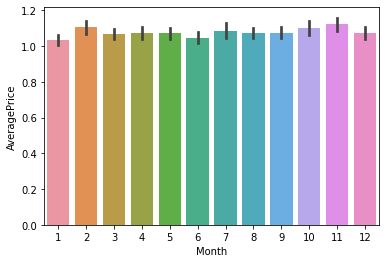

In [47]:
sb.barplot(avacado_data['Month'],avacado_data['AveragePrice'])

In [48]:
avacado_data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7,10
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7,9
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7,2
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7,9


   #### OBSERVATIONS : 
        -- All the months sales very near to each other , not much influenct of month in Average price of Avacado.

#### MULTIVARIANTE ANALYSIS
    -- Corelation Table

<AxesSubplot:>

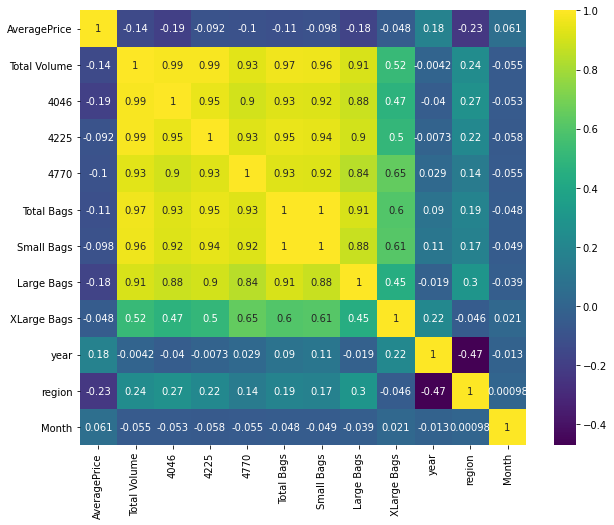

In [49]:
plt.figure(figsize=(10,8))
sb.heatmap(avacado_data.corr(),annot=True,cmap='viridis')

#### OBSERVATIONS:
            - Average price has moderate correlation with year, Region, LArge Bags,4770,4225,4046,Total volume, small Bags..
            - High Multi Collinearitty Observed Between Small Bags/ total bags/ Large Bags with Total Volume/4046/4225/4770
            - Month of Date has no such correlation with AveraGE PRICE , wE CAN REMOVE THAT FEATURE.

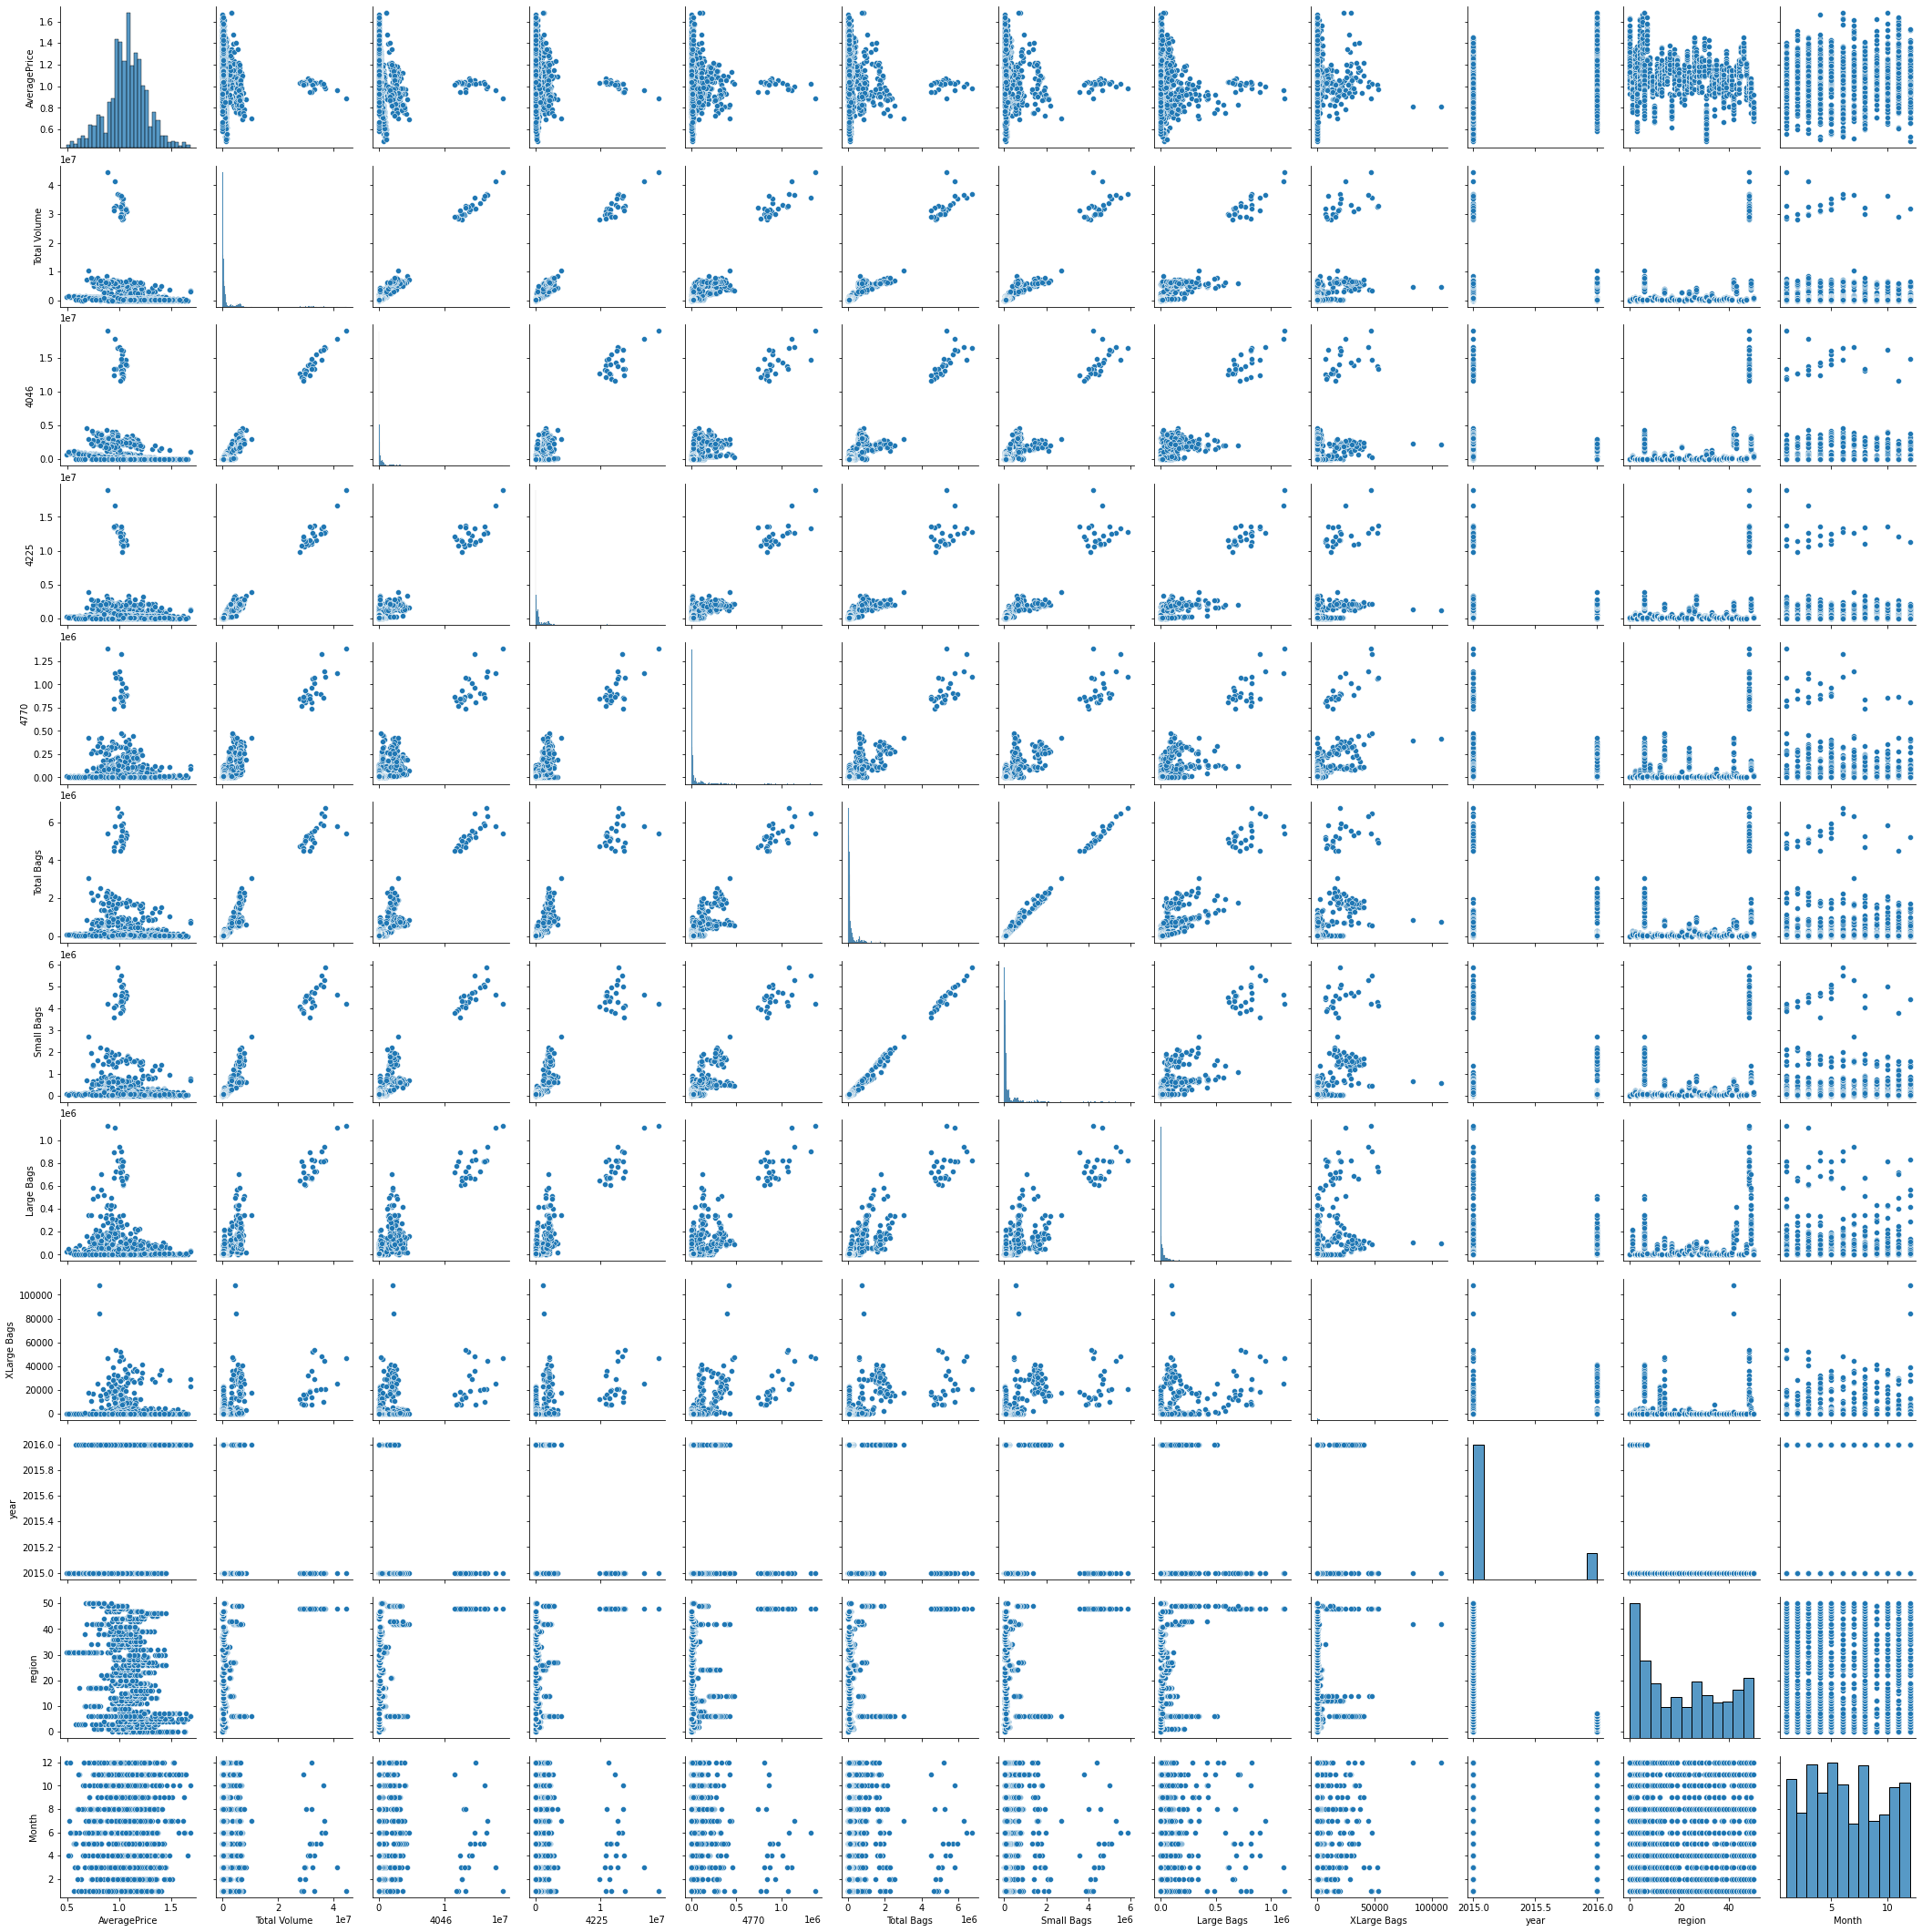

In [50]:
sb.pairplot(avacado_data)

#### TREATMENT OF OUTLIERS
    - ZSCORE METHOD

In [51]:
from scipy.stats import zscore

In [52]:
avacado_data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7,10
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7,9
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7,2
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7,9


In [53]:
data = avacado_data

In [54]:
scores = np.abs(zscore(data))

In [55]:
len(np.where(scores>3)[0])

244

In [56]:
data = data[(scores<3).all(axis=1)]

In [57]:
data.shape

(1436, 12)

#### DATA LOSS : upto 5.5% .


In [58]:
data.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
Month           0.111898
dtype: float64

### AS ALL THE FEATURES ARE STILL SUFFERING FROM SKEWNESS, Applying Power Transformer to whole DataSet

In [59]:
from sklearn.preprocessing import PowerTransformer

In [60]:
power = PowerTransformer()

In [61]:
features = power.fit_transform(data.drop('AveragePrice',axis=1))

In [62]:
transformed_data = pd.DataFrame(features, columns=data.columns[1:])

In [63]:
transformed_data.skew()

Total Volume    0.000000
4046           -0.025799
4225            0.000835
4770           -0.054751
Total Bags     -0.000866
Small Bags      0.013734
Large Bags     -0.118018
XLarge Bags     0.479994
year            2.004439
region         -0.219708
Month          -0.136692
dtype: float64

In [64]:
y = data['AveragePrice']

### SKEWNESS REMOVED 

### STEP 3 : DATA MODELLING

In [65]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor

In [66]:
randomstate = 0
max_score = 0
lr = XGBRegressor()
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(transformed_data,y,test_size=.25,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)    
    if(score>max_score):
        max_score = score
        randomstate  = i
print( 'Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score*100)

Random State= 15  and R2 Score of LR MODEL :  84.38853835951683


In [67]:
x_train,x_test,y_train,y_test = train_test_split(transformed_data,y,test_size=.27,random_state=randomstate)

In [68]:
r2_scores = []
cv_scores = []
rmse_scores = []

In [69]:
def model_predict(model):
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    r2score = r2_score(y_test,predictions)
    print('------------',model,'--------------')
    print(' R2 Score                : ', r2score)
    print('MAE Score                : ', mean_absolute_error(y_test,predictions))
    print('MSE Score                : ', mean_squared_error(y_test,predictions))
    print('RMSE Score               : ', np.sqrt(mean_squared_error(y_test,predictions)))
    print('Cross Validation Score   : ',np.mean(cross_val_score(model,transformed_data,y,cv=5,scoring='r2')))
    
    r2_scores.append(r2score)
    cv_scores.append(np.mean(cross_val_score(model,transformed_data,y,cv=5,scoring='r2')))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test,predictions)))
    
    plt.figure(figsize=(8,5))
    sb.regplot(y_test,predictions)
    plt.xlabel('Y True ')
    plt.ylabel('Y Predicted')
    
    

### 3.1 LINEAR REGRESSION

------------ LinearRegression() --------------
 R2 Score                :  0.3923298113242485
MAE Score                :  0.12153750036176755
MSE Score                :  0.024338910199925935
RMSE Score               :  0.15600932728502465
Cross Validation Score   :  -0.062425652836002724


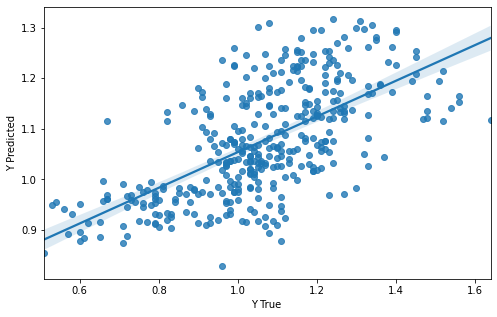

In [70]:
model_predict(LinearRegression())



#### OBSERVATION: 
        - LinearRegression wont work properly as all the features are very strongly correlated to each making it difficult for linear regression to work and UNDERFITS THE DATA.
        
        - As you can see in the Graph , High Biased Prediction gives rise to UnderFitting.

### 3.2 REGULARIZATION: 
        - LASSO
        - Ridge
        
        
  #### LASSO

------------ Lasso(alpha=0.02) --------------
 R2 Score                :  0.306027068574957
MAE Score                :  0.12989714511033099
MSE Score                :  0.027795579203814053
RMSE Score               :  0.16672006239146522
Cross Validation Score   :  0.1870866259323008


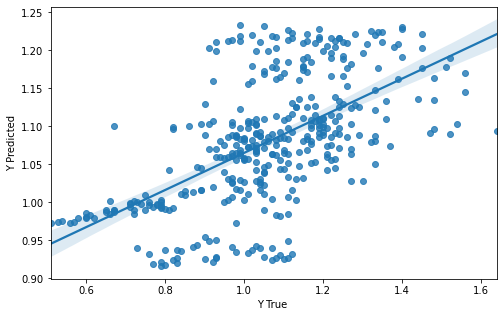

In [71]:
model_predict(Lasso(alpha=.02))



#### RIDGE

------------ Ridge() --------------
 R2 Score                :  0.3916066405332661
MAE Score                :  0.1215128419889598
MSE Score                :  0.024367875236007905
RMSE Score               :  0.1561021307862513
Cross Validation Score   :  -0.06477235274353421


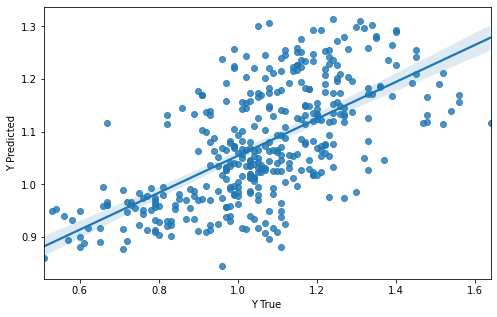

In [72]:
model_predict(Ridge())

#### MODELS OTHER THAN REGRESSION MODELS ARE NOT PRONE TO UNDERFIT  LIKE SVC, KNN , DECISION TREE, Random Forest.

### SVC

------------ SVR() --------------
 R2 Score                :  0.7616155626601075
MAE Score                :  0.07793378884979076
MSE Score                :  0.00954797112249228
RMSE Score               :  0.09771372023668058
Cross Validation Score   :  0.11629826822933145


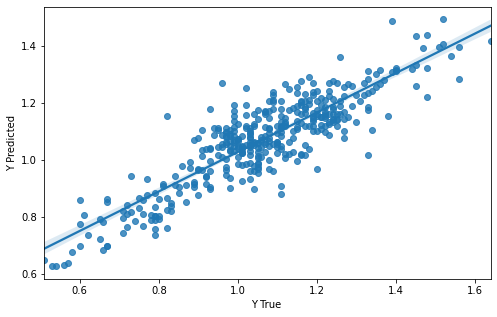

In [73]:
model_predict(SVR())

#### KNRegressor

------------ KNeighborsRegressor() --------------
 R2 Score                :  0.7583107003880499
MAE Score                :  0.07325257731958762
MSE Score                :  0.009680340206185566
RMSE Score               :  0.09838871991333949
Cross Validation Score   :  -0.3272272446055219


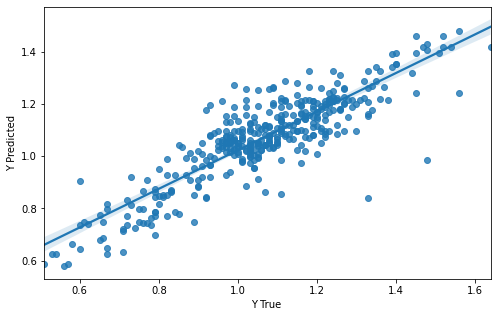

In [74]:
model_predict(KNeighborsRegressor(n_neighbors=5))

#### DECISION TREE REGRESSOR

------------ DecisionTreeRegressor() --------------
 R2 Score                :  0.671110919025318
MAE Score                :  0.07255154639175257
MSE Score                :  0.013172938144329897
RMSE Score               :  0.11477342089669497
Cross Validation Score   :  -0.4960706418645673


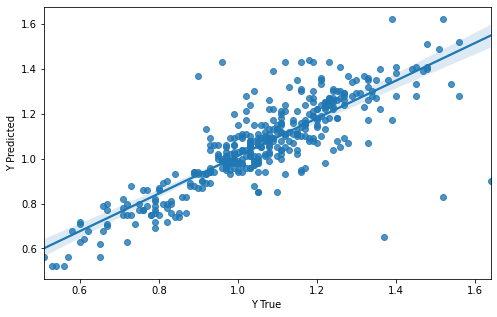

In [75]:
model_predict(DecisionTreeRegressor())

#### RANDOM FOREST REGRESSOR

------------ RandomForestRegressor(n_estimators=200) --------------
 R2 Score                :  0.8314598093083398
MAE Score                :  0.05655451030927834
MSE Score                :  0.006750511449742273
RMSE Score               :  0.08216149615082646
Cross Validation Score   :  0.16876301799987203


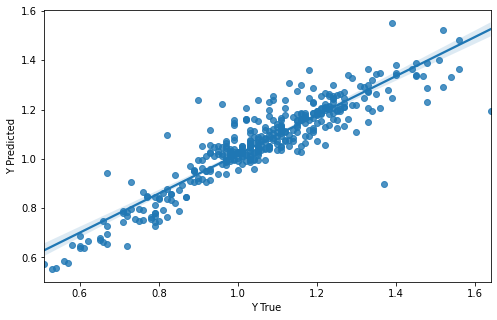

In [76]:
model_predict(RandomForestRegressor(n_estimators=200))

#### GRADIENT BOOSTING REGRESSOR

------------ GradientBoostingRegressor() --------------
 R2 Score                :  0.7768430260868654
MAE Score                :  0.0713463878629293
MSE Score                :  0.008938068132641527
RMSE Score               :  0.09454135673154647
Cross Validation Score   :  0.08854271526620397


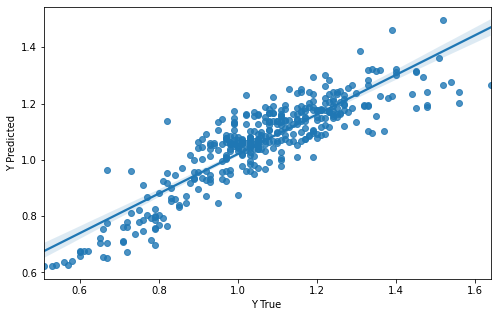

In [77]:
model_predict(GradientBoostingRegressor())

#### XGBOOST REGRESSOR

------------ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) --------------
 R2 Score                :  0.8277105425796453
MAE Score                :  0.0600197944936064
MSE Score                :  0.006900680189176617
RMSE Score               :  0.08307033278599898
Cross Validation Score   :  0.025014859843842087


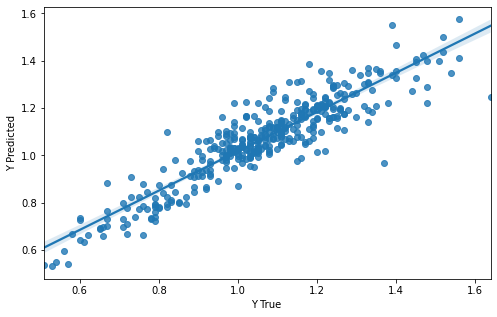

In [78]:
model_predict(XGBRegressor())

In [79]:
from lightgbm import LGBMRegressor

#### LIGHT GBM REGRESSOR

------------ LGBMRegressor() --------------
 R2 Score                :  0.8469416886186014
MAE Score                :  0.05776735729523433
MSE Score                :  0.006130418383996026
RMSE Score               :  0.07829698834563195
Cross Validation Score   :  0.1431906063756336


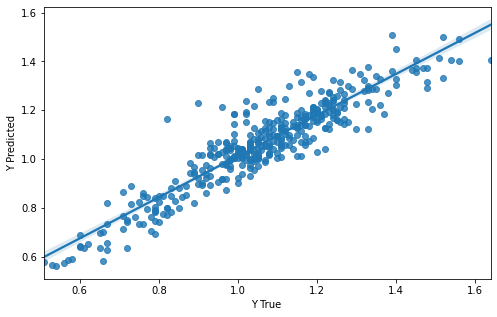

In [80]:
model_predict(LGBMRegressor())

In [81]:
r2_scores

[0.3923298113242485,
 0.306027068574957,
 0.3916066405332661,
 0.7616155626601075,
 0.7583107003880499,
 0.671110919025318,
 0.8314598093083398,
 0.7768430260868654,
 0.8277105425796453,
 0.8469416886186014]

In [82]:
error = []
for i in range(0,10):
    error.append(np.abs(r2_scores[i] - cv_scores[i]))
    

In [83]:
tab = {
    'R2 Score': r2_scores, 
    'CV Score': cv_scores, 
    'Error/Bias (r2score - CVScore)': error,
    'RMSE Metric':rmse_scores
    
}

In [84]:
table_models = pd.DataFrame(tab,index=['LRegression','Lasso','Ridge','SVR','KNRegressor',
                                       'DTR','RF','GB','XGBRegressor','LightGBM'
                                      ])

In [85]:
table_models

,R2 Score,CV Score,Error/Bias (r2score - CVScore),RMSE Metric
LRegression,0.392330,-0.062426,0.454755,0.156009
Lasso,0.306027,0.187087,0.118940,0.166720
Ridge,0.391607,-0.064772,0.456379,0.156102
SVR,0.761616,0.116298,0.645317,0.097714
KNRegressor,0.758311,-0.327227,1.085538,0.098389
DTR,0.671111,-0.499565,1.170676,0.114773
RF,0.831460,0.171945,0.659515,0.082161
GB,0.776843,0.101260,0.675583,0.094541
XGBRegressor,0.827711,0.025015,0.802696,0.083070
LightGBM,0.846942,0.143191,0.703751,0.078297


### OBSERVATION:
        - Lowest Error/ Bias in is LgihtGBM, Random Forest, SVR, GB, XGB, All SAVE COMPARITIVELY small error, We also take the  R2_Score in consideration with the Lowest Bias, we CAN CHOOSE ANY MODEL Between LightGBM/ RF. Both have Highest r2Score with Least Bias.
        
        - Regression models have low error tern but r2_score are not good and also high RMSE MEtric and are undergoing UNderfitting, not a choice for modelling.
        
        - Choosen Model: LightGBR , AS it has high scope to reduce the overfitting

### HYPERPARAMETER TUNING LIGHT GBR

In [121]:
params_lgbr = {
    'num_leaves': [70,80,50,40,20],
    'max_depth': [5,7,10,12,15],
   
    'bagging_freq': [5,10,15,7,12], 
    "bagging_fraction": [0.75,.6,.5,.8,.85,.7],
    'learning_rate': [.01,.02,.1,.5]
}
LightGBR = LGBMRegressor()

In [122]:
grid_l= RandomizedSearchCV(LightGBR,params_lgbr,cv=5,scoring='r2',n_iter=100,verbose=2,n_jobs=5)

In [123]:
grid_l.fit(transformed_data,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100, n_jobs=5,
                   param_distributions={'bagging_fraction': [0.75, 0.6, 0.5,
                                                             0.8, 0.85, 0.7],
                                        'bagging_freq': [5, 10, 15, 7, 12],
                                        'learning_rate': [0.01, 0.02, 0.1, 0.5],
                                        'max_depth': [5, 7, 10, 12, 15],
                                        'num_leaves': [70, 80, 50, 40, 20]},
                   scoring='r2', verbose=2)

In [124]:
grid_l.best_estimator_

LGBMRegressor(bagging_fraction=0.5, bagging_freq=10, learning_rate=0.02,
              max_depth=15, num_leaves=50)

------------ LGBMRegressor(bagging_fraction=0.5, bagging_freq=10, learning_rate=0.02,
              max_depth=15, num_leaves=50) --------------
 R2 Score                :  0.7399338863733682
MAE Score                :  0.07941335701833672
MSE Score                :  0.01041638359682611
RMSE Score               :  0.1020606858532026
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: b

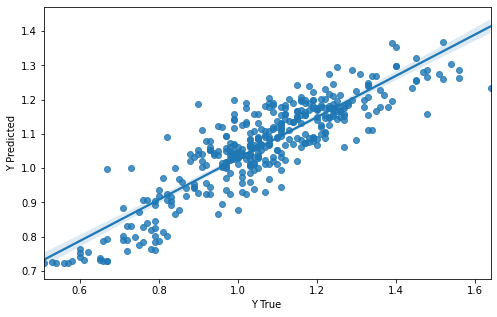

In [125]:
model_predict(LGBMRegressor(bagging_fraction=0.5, bagging_freq=10, learning_rate=0.02,
              max_depth=15, num_leaves=50))

### EVALUATION FINAL HYPER TUNED MODEL

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
------------ LGBMRegressor(bagging_fraction=0.5, bagging_freq=10, learning_rate=0.02,
              max_depth=15, num_leaves=50) --------------
 R2 Score                :  0.7399338863733682
MAE Score                :  0.07941335701833672
MSE Score                :  0.01041638359682611
RMSE Score               :  0.1020606858532026
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: b

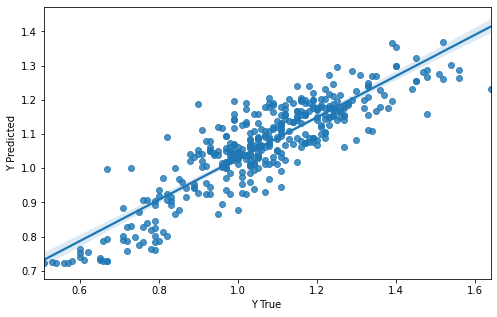

In [126]:
model_predict(LGBMRegressor(bagging_fraction=0.5, bagging_freq=10, learning_rate=0.02,
              max_depth=15, num_leaves=50))

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
------------ LGBMRegressor(bagging_fraction=0.5, bagging_freq=10, learning_rate=0.02,
              max_depth=15, num_leaves=50) --------------
 R2 Score                :  0.7399338863733682
MAE Score                :  0.07941335701833672
MSE Score                :  0.01041638359682611
RMSE Score               :  0.1020606858532026
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: b

Text(0, 0.5, 'Y Predicted')

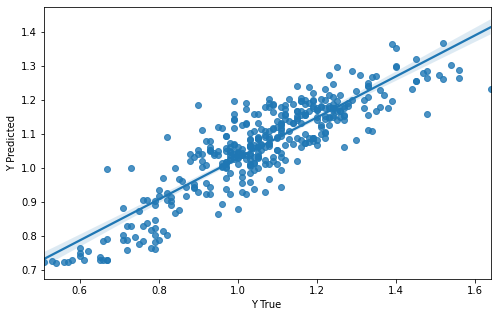

In [128]:
    model = LGBMRegressor(bagging_fraction=0.5, bagging_freq=10, learning_rate=0.02,
              max_depth=15, num_leaves=50)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    r2score = r2_score(y_test,predictions)
    print('------------',model,'--------------')
    print(' R2 Score                : ', r2score)
    print('MAE Score                : ', mean_absolute_error(y_test,predictions))
    print('MSE Score                : ', mean_squared_error(y_test,predictions))
    print('RMSE Score               : ', np.sqrt(mean_squared_error(y_test,predictions)))
    print('Cross Validation Score   : ',np.mean(cross_val_score(model,transformed_data,y,cv=5,scoring='r2')))
    
    r2_scores.append(r2score)
    cv_scores.append(np.mean(cross_val_score(model,transformed_data,y,cv=5,scoring='r2')))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test,predictions)))
    
    plt.figure(figsize=(8,5))
    sb.regplot(y_test,predictions)
    plt.xlabel('Y True ')
    plt.ylabel('Y Predicted')
    

### MODEL WITH LEAST OVERFIT DIFFERNCE SAVING

In [129]:
import joblib

In [132]:
joblib.dump(model,'avacado_model.pk')

['avacado_model.pk']

In [133]:
joblib.load('avacado_model.pk')

LGBMRegressor(bagging_fraction=0.5, bagging_freq=10, learning_rate=0.02,
              max_depth=15, num_leaves=50)